In [1]:
# Andrew Wong
# New York Institute of Technology
# CSCI 657 Intro to Data Mining
# Professor Gu

import csv
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
fullValueNames = {}
fullValueNames['classes'] = {'e':'edible','p':'poisonous'}
fullValueNames['cap-shape'] = {'b':'bell','c': 'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'}
fullValueNames['cap-surface'] = {'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'}
fullValueNames['cap-color'] = {'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'}
fullValueNames['bruises'] = {'t':'bruises','f':'no'}
fullValueNames['odor'] = {'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'}
fullValueNames['gill-attachment'] = {'a':'attached','d':'descending','f':'free','n':'notched'}
fullValueNames['gill-spacing'] = {'c':'close','w':'crowded','d':'distant'}
fullValueNames['gill-size'] = {'b':'broad','n':'narrow'}
fullValueNames['gill-color'] = {'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'}
fullValueNames['stalk-shape'] = {'e':'enlarging','t':'tapering'}
fullValueNames['stalk-root'] = {'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted','?':'missing'}
fullValueNames['stalk-surface-above-ring'] = {'f':'fibrous','y':'scaly','k':'silky','s':'smooth'}
fullValueNames['stalk-surface-below-ring'] = {'f':'fibrous','y':'scaly','k':'silky','s':'smooth'}
fullValueNames['stalk-color-above-ring'] = {'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'}
fullValueNames['stalk-color-below-ring'] = {'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'}
fullValueNames['veil-type'] = {'p':'partial','u':'universal'}
fullValueNames['veil-color'] = {'n':'brown','o':'orange','w':'white','y':'yellow'}
fullValueNames['ring-number'] = {'n':0,'o':1,'t':2}
fullValueNames['ring-type'] = {'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'}
fullValueNames['spore-print-color'] = {'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'}
fullValueNames['population'] = {'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'}
fullValueNames['habitat'] = {'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'}

In [3]:
def renameValue(key, val):
    return fullValueNames[key][val]

In [4]:
rows = []
X = []
y = []
with open("mushrooms.csv", 'r', encoding="utf8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        rows.append(row)
        X.append([fullValueNames[key][val] for key, val in row.items() if key != 'class'])
        if (row['class'] == 'p'):
            y.append(0)
        else:
            y.append(1)

df = pd.DataFrame.from_dict(rows, orient='columns')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Accuracy: 94.21%
Precision: 90.92%
Recall: 98.69%
Specificity: 89.4%


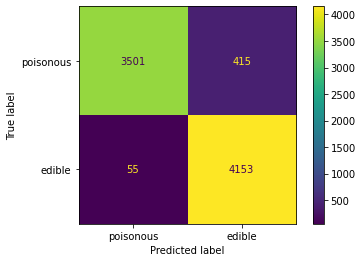

In [5]:
X_enc = OneHotEncoder().fit_transform(X).toarray()
classifier = CategoricalNB()
classifier.fit(X_enc, y)

y_pred = classifier.predict(X_enc)
acc = metrics.accuracy_score(y, y_pred)
pre = metrics.precision_score(y, y_pred)
rec = metrics.recall_score(y, y_pred)
spe = metrics.recall_score(y, y_pred, pos_label=0)
cm = metrics.confusion_matrix(y, y_pred)

print(f'Accuracy: {round(acc*100, 2)}%')
print(f'Precision: {round(pre*100, 2)}%')
print(f'Recall: {round(rec*100, 2)}%')
print(f'Specificity: {round(spe*100, 2)}%')

disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['poisonous', 'edible'])
disp.plot()

Accuracy: 94.73%
Precision: 91.55%
Recall: 99.06%
Specificity: 90.0%


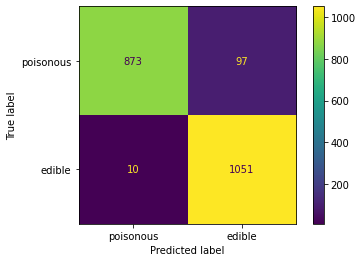

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, random_state=0)
classifier2 = CategoricalNB()
classifier2.fit(X_train, y_train)

y_pred2 = classifier2.predict(X_test)
acc2 = metrics.accuracy_score(y_test, y_pred2)
pre2 = metrics.precision_score(y_test, y_pred2)
rec2 = metrics.recall_score(y_test, y_pred2)
spe2 = metrics.recall_score(y_test, y_pred2, pos_label=0)
cm2 = metrics.confusion_matrix(y_test, y_pred2)

print(f'Accuracy: {round(acc2*100, 2)}%')
print(f'Precision: {round(pre2*100, 2)}%')
print(f'Recall: {round(rec2*100, 2)}%')
print(f'Specificity: {round(spe2*100, 2)}%')

disp = metrics.ConfusionMatrixDisplay(cm2, display_labels=['poisonous', 'edible'])
disp.plot()

Accuracy: 94.24%
Precision: 90.9%
Recall: 98.76%
Specificity: 89.38%


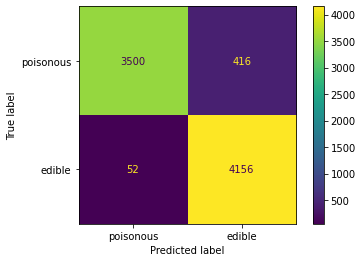

In [7]:
y_pred3 = classifier2.predict(X_enc)
acc3 = metrics.accuracy_score(y, y_pred3)
pre3 = metrics.precision_score(y, y_pred3)
rec3 = metrics.recall_score(y, y_pred3)
spe3 = metrics.recall_score(y, y_pred3, pos_label=0)
cm3 = metrics.confusion_matrix(y, y_pred3)

print(f'Accuracy: {round(acc3*100, 2)}%')
print(f'Precision: {round(pre3*100, 2)}%')
print(f'Recall: {round(rec3*100, 2)}%')
print(f'Specificity: {round(spe3*100, 2)}%')

disp = metrics.ConfusionMatrixDisplay(cm3, display_labels=['poisonous', 'edible'])
disp.plot()